Colinearity in Regression Model (OLS)

When we are building a regression model, we obviously want to model the relationship between a dependent variable and one or more independent variables.
However, more often than not, we might encounter a situation where the coefficient estimate of each independent variable “doesn’t make sense” and we can’t explain why it occurs. If you ever encounter this situation, there might be collinearity in your regression model.

# What is Collinearity?

- Collinearity occurs because independent variables that we use to build a regression model are correlated with each other. This is problematic because as the name suggests, an independent variable should be independent. It shouldn’t have any correlation with other independent variables.
- If collinearity exists between independent variables, one of the key points of regression analysis is violated. In regression analysis, we want to isolate the influence of each independent variable on our dependent variable. This way, we can interpret the coefficient estimate as the mean change in the dependent variable for each 1 unit change in an independent variable while keeping the other independent variables constant.
- Now if we have collinearity, the key point above is no longer valid, as if we change the value of one independent variable, the other independent variables that are correlated will also change.
- In this post, we are going to see why collinearity becomes such a problem for our regression model, how we can detect it, how it affects our model, and what we can do to remove collinearity.


# Cars DataSet

- To make it more clear why collinearity is such a problem, let’s take a look at a use case.
- For the use case, I am going to use the car dataset that i downloaded it easily on Kaggle.
- Let’s imagine we want to predict the price of a car, or price variable in the dataset. To predict it, we will use certain independent variables such as the car’s city MPG, highway MPG, horsepower, engine size, stroke, width, peak RPM, and compression ratio. Next, we build a regression model based on these independent variables.

In [1]:
import pandas as pd 
import numpy as np 
import statsmodels.api as sm 

In [2]:
cars = pd.read_csv('CarPrice_Assignment.csv')

# EDA

In [3]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
cars.shape

In [ ]:
cars.info()

In [ ]:
cars.describe()

In [ ]:
cars.columns

# Missing Value 

In [4]:
# checking the empty cells or NAN in each variable : no empty cells in cars data set 
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Histogram of Price 

In [ ]:
from plotnine import ggplot , aes , geom_histogram , theme_minimal 
ggplot(cars) + aes(x = 'price') + geom_histogram(bins = 20 , fill = "green" , alpha =0.7) + theme_minimal()

# Shapiro's Test

**The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.**

In [ ]:
from scipy import stats                               
shapiro_test = stats.shapiro(cars['price'])
shapiro_test

In [ ]:
cars.columns

# Splitting Data 

In [5]:
# Features Variables : 
X = cars[['highwaympg','citympg','peakrpm','horsepower','compressionratio','stroke','boreratio','enginesize','carwidth']]

# Target Variable : 
Y = cars['price']

In [6]:
# We need to add the column of ones to the X to calculate the intercept 𝑏₀.
# statsmodels doesn’t takes 𝑏₀ into account by default. This is just one function call:
X = sm.add_constant(X)
X

,const,highwaympg,citympg,peakrpm,horsepower,compressionratio,stroke,boreratio,enginesize,carwidth
0,1.0,27,21,5000,111,9.0,2.68,3.47,130,64.1
1,1.0,27,21,5000,111,9.0,2.68,3.47,130,64.1
2,1.0,26,19,5000,154,9.0,3.47,2.68,152,65.5
3,1.0,30,24,5500,102,10.0,3.40,3.19,109,66.2
4,1.0,22,18,5500,115,8.0,3.40,3.19,136,66.4
...,...,...,...,...,...,...,...,...,...,...
200,1.0,28,23,5400,114,9.5,3.15,3.78,141,68.9
201,1.0,25,19,5300,160,8.7,3.15,3.78,141,68.8
202,1.0,23,18,5500,134,8.8,2.87,3.58,173,68.9
203,1.0,27,26,4800,106,23.0,3.40,3.01,145,68.9


In [20]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split( X , Y , test_size = 0.3 , random_state = 1 )

In [21]:
type(X_train)

pandas.core.frame.DataFrame

# Training The Model 

In [24]:
import statsmodels.api as sm 
model = sm.OLS(Y_train , X_train).fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     84.97
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           9.50e-51
Time:                        09:21:24   Log-Likelihood:                -1352.2
No. Observations:                 143   AIC:                             2724.
Df Residuals:                     133   BIC:                             2754.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.066e+04   1.51e+04     -3.346      0.001   -8.06e+04   -2.07e+04
highwaympg         135.6009    171.219      0.792      0.430    -203.063     474.265
citympg           -293.0258    193.905     -1.511      0.133    -676.562      90.510
peakrpm              2.3947      0.825      2.901      0.004       0.762       4.027
horsepower          19.1123     16.745      1.141      0.256     -14.009      52.233
compressionratio   370.6980     90.791      4.083      0.000     191.116     550.280
stroke           -2945.5374    906.632     -3.249      0.001   -4738.820   -1152.255
boreratio         -764.9530   1318.141     -0.580      0.563   -3372.184    1842.278
enginesize         124.4571     15.299      8.135      0.000      94.196     154.718
carwidth           687.1730    200.502      3.427      0.001     290.588    1083.758
==============================================================================
Omnibus:                        7.481   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.024   Jarque-Bera (JB):               13.851
Skew:                           0.046   Prob(JB):                     0.000982
Kurtosis:                       4.522   Cond. No.                     2.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Results Interpretation 

- **Our model is actually doing pretty well, as it has an R² of 85.2%.**
- **Now the problem comes when we try to interpret the model. If we take a look at the coefficient estimate values, the coefficient of highway MPG (135.6009) and city MPG (- 293.0258) have the opposite signs. This doesn’t make sense at all because if a highway MPG of a car increases its price, then the city MPG should also do the same. But this is not the case.**
- **Also, the p-Values of both highway MPG and city MPG are shown insignificant by the model (>0.05), indicating that we can exclude them from our regression model. But are they actually insignificant?**
- **If we reckon that there might be a slight chance of collinearity in the model, we shouldn’t trust this p-Value straight away.**

# Detecting Collinearity

**There are two easy ways to detect if collinearity exists in our regression model.The first one is by looking at the pairplot or the correlation matrix of our independent variables. The rule of thumb is that if two independent variables have a Pearson’s correlation above 0.9, then we can say that both independent variables are highly correlated with each other and thus, they are collinear.**

### Pairplot

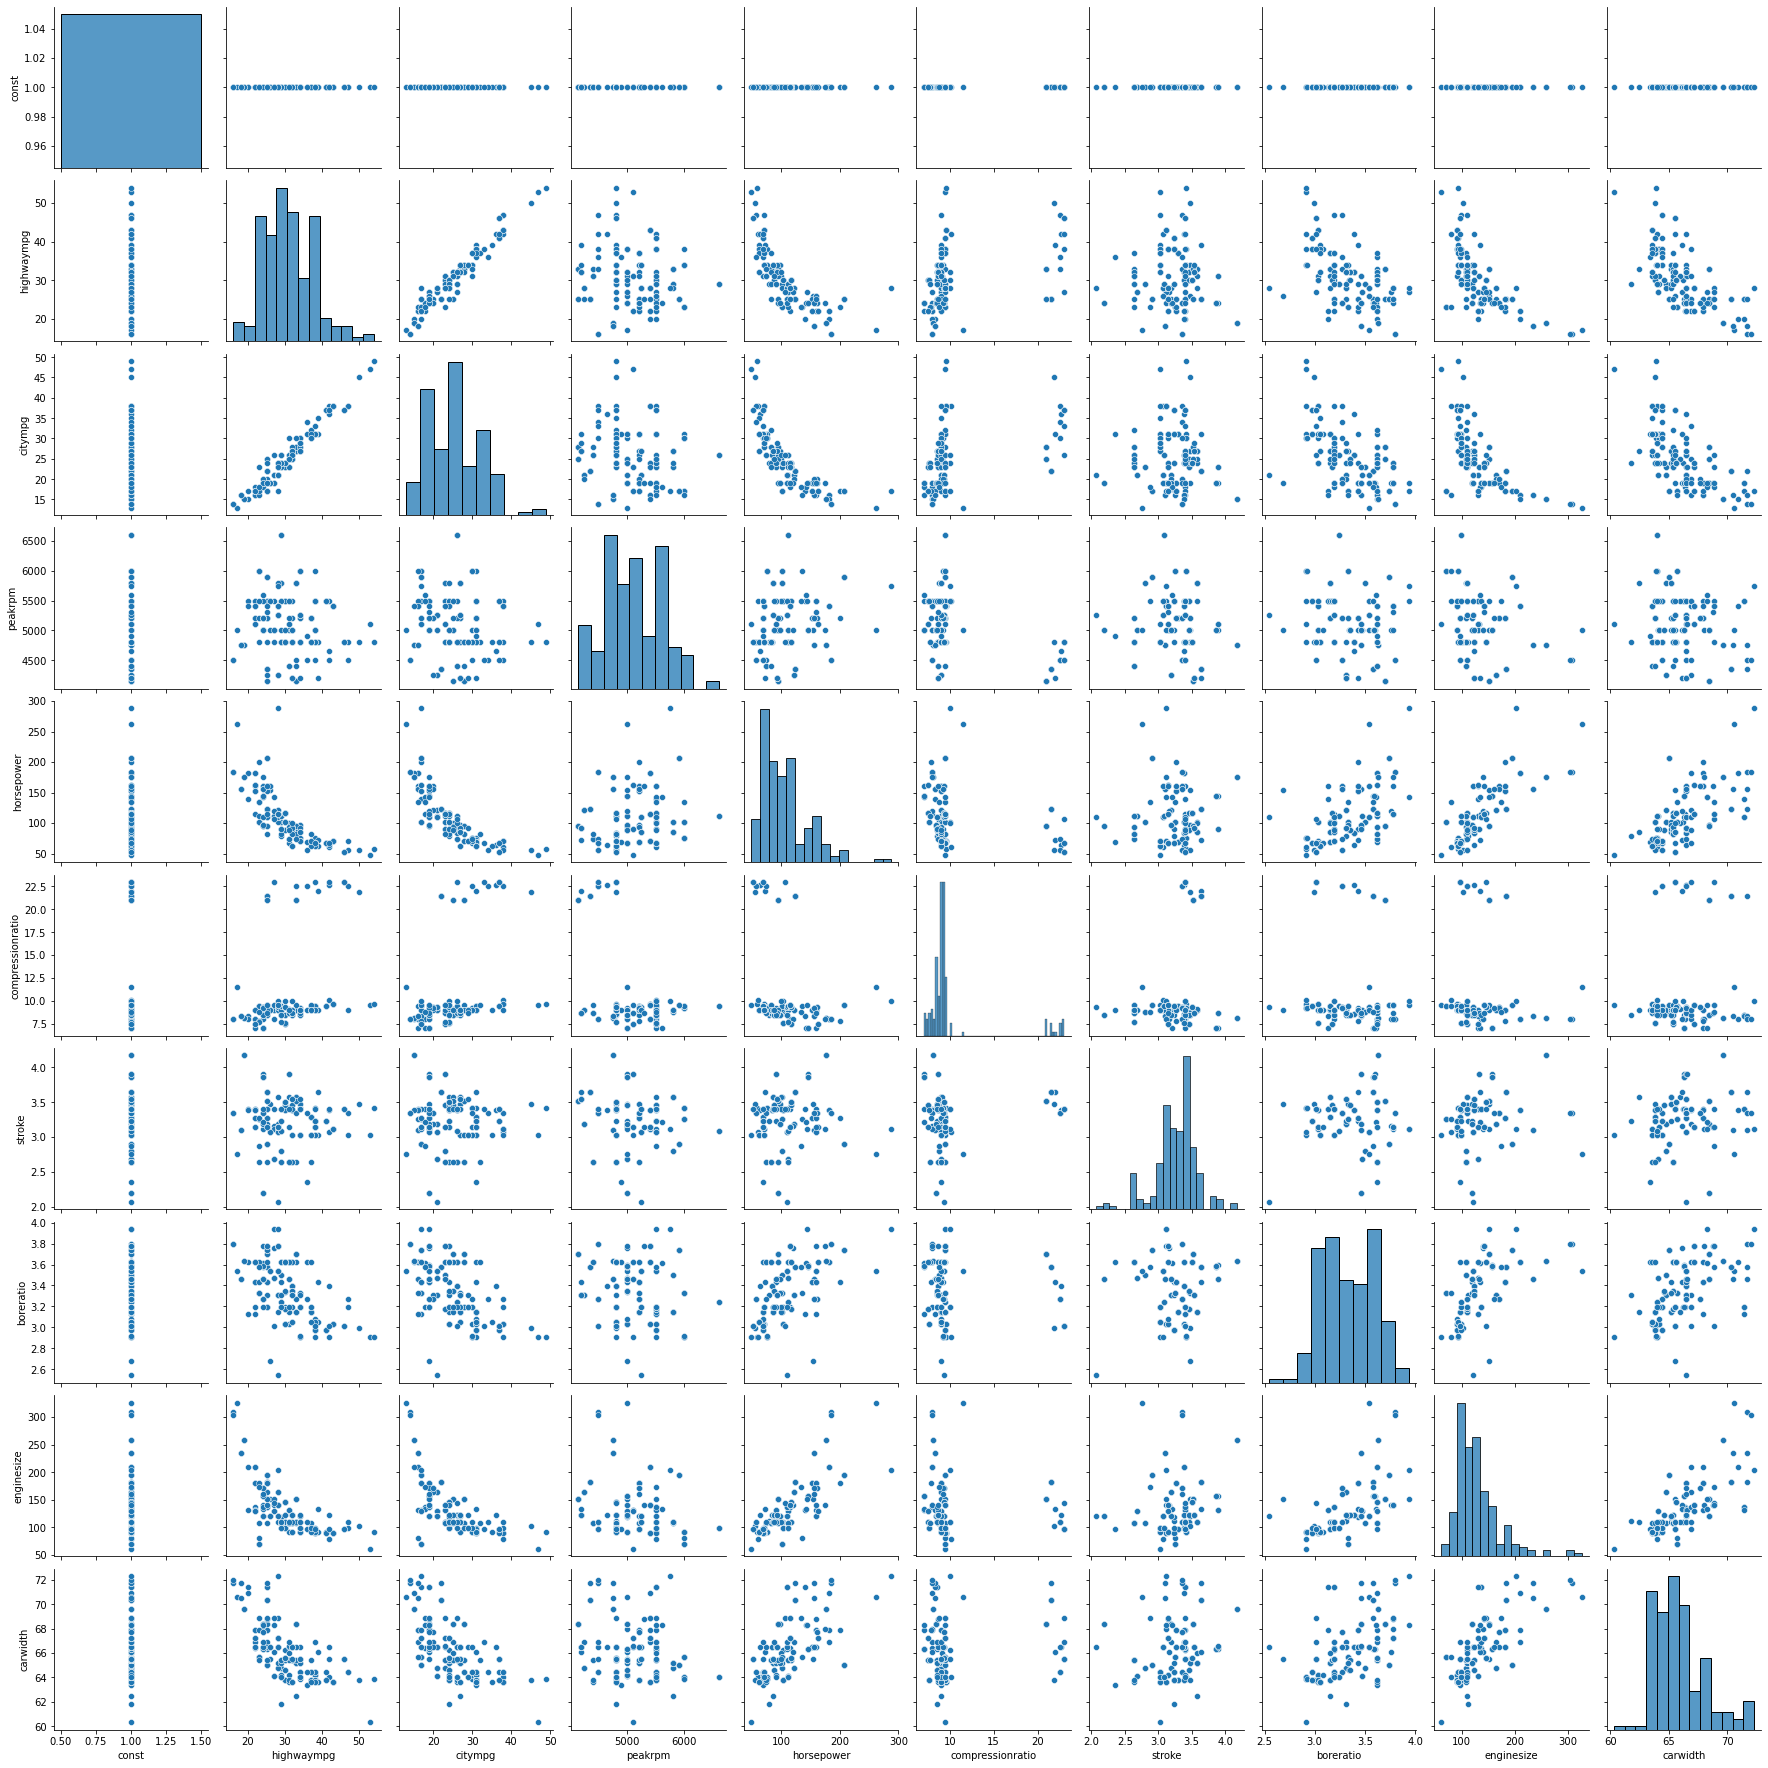

In [30]:
# pairs plot :
import seaborn as sn
sn.pairplot(X)

### Correlation Matrix

In [28]:
CorrMatrix = X.corr()
CorrMatrix

,const,highwaympg,citympg,peakrpm,horsepower,compressionratio,stroke,boreratio,enginesize,carwidth
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
highwaympg,NaN,1.000000,0.971337,-0.054275,-0.770544,0.265201,-0.043931,-0.587012,-0.677470,-0.677218
citympg,NaN,0.971337,1.000000,-0.113544,-0.801456,0.324701,-0.042145,-0.584532,-0.653658,-0.642704
peakrpm,NaN,-0.054275,-0.113544,1.000000,0.131073,-0.435741,-0.067964,-0.254976,-0.244660,-0.220012
horsepower,NaN,-0.770544,-0.801456,0.131073,1.000000,-0.204326,0.080940,0.573677,0.809769,0.640732
compressionratio,NaN,0.265201,0.324701,-0.435741,-0.204326,1.000000,0.186110,0.005197,0.028971,0.181129
stroke,NaN,-0.043931,-0.042145,-0.067964,0.080940,0.186110,1.000000,-0.055909,0.203129,0.182942
boreratio,NaN,-0.587012,-0.584532,-0.254976,0.573677,0.005197,-0.055909,1.000000,0.583774,0.559150
enginesize,NaN,-0.677470,-0.653658,-0.244660,0.809769,0.028971,0.203129,0.583774,1.000000,0.735433
carwidth,NaN,-0.677218,-0.642704,-0.220012,0.640732,0.181129,0.182942,0.559150,0.735433,1.000000


<AxesSubplot:>

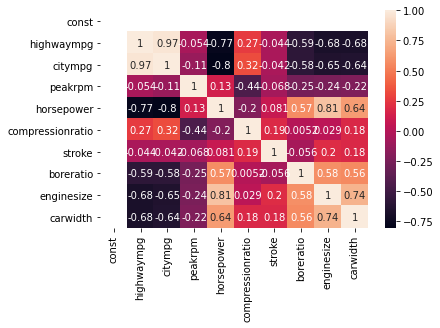

In [31]:
# annot = True : show pearson correlation coefficient 
sn.heatmap(CorrMatrix ,annot =True)

In [32]:
# set_precision(2) : two digits 
CorrMatrix.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\Mostafa\anaconda3\lib\site-packages\pandas\io\formats\style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
C:\Users\Mostafa\anaconda3\lib\site-packages\pandas\io\formats\style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,const,highwaympg,citympg,peakrpm,horsepower,compressionratio,stroke,boreratio,enginesize,carwidth
const,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
highwaympg,nan,1.00,0.97,-0.05,-0.77,0.27,-0.04,-0.59,-0.68,-0.68
citympg,nan,0.97,1.00,-0.11,-0.80,0.32,-0.04,-0.58,-0.65,-0.64
peakrpm,nan,-0.05,-0.11,1.00,0.13,-0.44,-0.07,-0.25,-0.24,-0.22
horsepower,nan,-0.77,-0.80,0.13,1.00,-0.20,0.08,0.57,0.81,0.64
compressionratio,nan,0.27,0.32,-0.44,-0.20,1.00,0.19,0.01,0.03,0.18
stroke,nan,-0.04,-0.04,-0.07,0.08,0.19,1.00,-0.06,0.20,0.18
boreratio,nan,-0.59,-0.58,-0.25,0.57,0.01,-0.06,1.00,0.58,0.56
enginesize,nan,-0.68,-0.65,-0.24,0.81,0.03,0.20,0.58,1.00,0.74
carwidth,nan,-0.68,-0.64,-0.22,0.64,0.18,0.18,0.56,0.74,1.00


**From the image above, we can clearly see that highway MPG and city MPG are highly correlated, as they have a Pearson’s correlation of 0.97. As they have a positive correlation, this means that if we increase the highway MPG, the city MPG will also increase by almost the same amount.**

### Variance Inflation Factor

**Variance Inflation Factor or VIF measures the influence of collinearity on the variance of our coefficient estimates. VIF can be described mathematically as follows:**

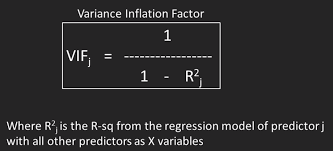

In [33]:
from IPython import display
display.Image("C:/Users/Mostafa/Desktop/Python/VIF.png")

- **From the equation above, we know that if R² of independent variable xi is large or close to 1, then the corresponding VIF of xi would be large as well. This means that independent variable xi can be explained by other independent variables. In other words, xi is highly correlated with other independent variables. Thus, the variance of the coefficient estimate βi is also high.**
- **We can use statsmodel library to calculate VIF in Python as follows**

In [ ]:
#calculate VIF for each explanatory variable
# X.shape[1] = number of column in X 
# X.values : transform X from DataFrame to ndarray

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

In [ ]:
# transpose the Data Frame vif : 
vif.T

In [ ]:
type(vif)

### How to Interpret VIF Values

- **The value for VIF starts at 1 and has no upper limit. A general rule of thumb for interpreting VIFs is as follows:**

- **A value of 1 indicates there is no correlation between a given explanatory variable and any other explanatory variables in the model.**
- **A value between 1 and 5 indicates moderate correlation between a given explanatory variable and other explanatory variables in the model, but this is often not severe enough to require attention.**
- **A value greater than 5 indicates potentially severe correlation between a given explanatory variable and other explanatory variables in the model. In this case, the coefficient estimates and p-values in the regression output are likely unreliable.**
- **In our use case, we can see that highway MPG and city MPG have VIF scores way above 10, indicating that they are highly correlated with each other. We can see this phenomenon as well from the correlation matrix above.**


# Removing Collinearity

**Now that we know severe collinearity exists in our independent variables, we need to find a way to fix this. There are two common ways to remove collinearity.**

### Principal Component Regression  and Variable Selection

- **The variable selection the most straightforward solution to remove collinearity and oftentimes, domain knowledge would be extremely helpful to achieve the best solution. To remove collinearity, we can exclude independent variables that have a high VIF value from our regression model.**
- **We know that highway MPG and city MPG have high VIF values. If we have domain knowledge, we know that it’s not necessary to exclude both from our regression model. Instead, we only need to pick either one of them. Let’s say that we exclude highway MPG from our model.**
- **We also know that both horsepower and engine size have moderately high VIF values as well. Although they measure different things, higher engine size generally corresponds to the higher horsepower. Thus, we exclude horsepower from our model.**
- **In the end, we built our regression model once again, but this time without highway MPG and horsepower.**

In [ ]:
X_train.columns

In [ ]:
X_selection = X_train[['const', 'citympg', 'peakrpm','compressionratio', 'stroke', 'boreratio', 'enginesize', 'carwidth']]

Y_selection = Y_train

In [ ]:
model_selection = sm.OLS(Y_selection , X_selection) .fit()
model_selection.summary()

In [ ]:
#calculate VIF for each explanatory variable

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_sel = pd.DataFrame()
vif_sel['VIF'] = [variance_inflation_factor(X_selection.values, i) for i in range(X_selection.shape[1])]
vif_sel['variable'] = X_selection.columns

#view VIF for each explanatory variable 
vif_sel

**And now we don’t have severe collinearity among independent variables anymore! Now we can proceed with our regression analysis.**

# The Effect of Removing Collinearity in Regression Model

- **Now that we remove collinearity in our independent variables, let’s compare the regression model with collinearity and without collinearity.**
- **The problem with collinearity is that it will inflate the variance or standard error of coefficient estimates.**
- **If we take a look at both models, the standard error of coefficient estimates in the regression model without collinearity is much less compared to the model with collinearity. The most apparent one is the city MPG variable. When collinearity exists, the standard error of the coefficient estimates of this variable is 169.14 compared to 60.30 when collinearity is removed.**
- **If we take a look at the p-Value, the model with collinearity concludes that the city MPG variable is statistically insignificant, meaning we can exclude this variable from our model.**
- **However, when we remove the collinearity, the p-Value of this variable is 0.003, which is actually statistically significant. Collinearity will inflate the variance of coefficient estimates of independent variables, making it difficult for us to trust the resulting p-Value from the model.**
- **Moreover, with sufficient variable selection, the F-statistics of the model without collinearity is much more significant than the model with collinearity, although the model with collinearity has more independent variables.**

# Do We Need to Remove Collinearity?

- **One important thing that we should notice is that collinearity would not affect the model prediction or the accuracy of the model. If you look at the R² comparison between the model with and without collinearity above, they are both similar. In fact, the model with collinearity typically yields better accuracy due to the fact it generally has more independent variables.**
- **Collinearity only affects the variance of coefficient estimates and the p-Values.**
- **So, if we want to build a regression model to make predictions and we don’t need to understand the influence of each independent variable, then we don’t need to remove collinearity in our model.**
- **However, if model interpretation is important for us and we need to understand the influence of each independent variable on the model’s prediction, then removing collinearity in our model is necessary.**

<center>-----------------------------------------------------The End--------------------------------------------------------------------